# PwC Call Center 


### Imports 

In [180]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
warnings.filterwarnings('ignore')

In [181]:
callCenter_df = pd.read_excel('/Users/darylwanji/Desktop/TATA/CallCentre/Data/01 Call-Center-Dataset.xlsx')
callCenter_df.sample(10)

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
852,ID0853,Jim,2021-01-15,16:43:41,Contract related,Y,Y,92.0,00:04:43,5.0
4604,ID4605,Martha,2021-03-23,13:03:22,Streaming,Y,N,51.0,00:05:31,3.0
3911,ID3912,Stewart,2021-03-10,10:07:41,Technical Support,Y,Y,74.0,00:06:37,5.0
2228,ID2229,Greg,2021-02-08,14:38:24,Technical Support,Y,Y,124.0,00:04:11,5.0
2076,ID2077,Becky,2021-02-05,14:47:02,Admin Support,Y,Y,78.0,00:06:12,3.0
2000,ID2001,Martha,2021-02-04,14:47:02,Payment related,Y,Y,28.0,00:01:49,5.0
2713,ID2714,Stewart,2021-02-17,09:23:02,Payment related,Y,N,15.0,00:01:04,3.0
2952,ID2953,Joe,2021-02-21,11:12:29,Payment related,Y,Y,115.0,00:00:37,4.0
4751,ID4752,Martha,2021-03-26,10:14:53,Technical Support,Y,Y,42.0,00:00:55,5.0
470,ID0471,Joe,2021-01-09,11:48:29,Payment related,N,N,NaN,NaN,NaN


In [182]:
callCenter_df.shape

(5000, 10)

> 5000 Observations for 10 different variables

In [183]:
callCenter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Call Id                     5000 non-null   object 
 1   Agent                       5000 non-null   object 
 2   Date                        5000 non-null   object 
 3   Time                        5000 non-null   object 
 4   Topic                       5000 non-null   object 
 5   Answered (Y/N)              5000 non-null   object 
 6   Resolved                    5000 non-null   object 
 7   Speed of answer in seconds  4054 non-null   float64
 8   AvgTalkDuration             4054 non-null   object 
 9   Satisfaction rating         4054 non-null   float64
dtypes: float64(2), object(8)
memory usage: 390.8+ KB


### Null values 
The are the columns that contain nulls values.      

> Speed of answer in seconds        
> AvgTalkDuration       
> Satisfaction rating       

### Data Types
The following datatypes needs to be addressed       
> Date, Time, AvgTalkDuration , Object -> Datetime        
> Answered (Y/N) and Resolved , Object -> Int 




In [184]:
callCenter_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Speed of answer in seconds,4054.0,67.520720,33.592872,10.0,39.0,68.0,97.0,125.0
Satisfaction rating,4054.0,3.403552,1.212220,1.0,3.0,3.0,4.0,5.0


> Takes on average 67 secs to answer a call with min 10s and max 125s           
>  3.4 Average rating           

These are excluding observations with no missing data handling. Anticipate a change after dealing with nulls values.

##### Datetime conversion 

In [185]:
callCenter_df['DateTime'] = pd.to_datetime(callCenter_df['Date'].astype(str) + ' '+ callCenter_df['Time'].astype(str))

##### Y/N Mapping 

In [186]:
"""
Mapping Y - > 1 and N - > 0 

"""
callCenter_df['Answered (Y/N)'] = callCenter_df['Answered (Y/N)'].map( {'Y': 1,'N': 0})
callCenter_df['Resolved'] = callCenter_df['Resolved'].map( {'Y': 1,'N': 0})

##### Sanity Check

In [187]:
callCenter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Call Id                     5000 non-null   object        
 1   Agent                       5000 non-null   object        
 2   Date                        5000 non-null   object        
 3   Time                        5000 non-null   object        
 4   Topic                       5000 non-null   object        
 5   Answered (Y/N)              5000 non-null   int64         
 6   Resolved                    5000 non-null   int64         
 7   Speed of answer in seconds  4054 non-null   float64       
 8   AvgTalkDuration             4054 non-null   object        
 9   Satisfaction rating         4054 non-null   float64       
 10  DateTime                    5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
me

In [188]:
callCenter_df.sample(10)

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating,DateTime
4849,ID4850,Jim,2021-03-27,17:35:31,Contract related,1,1,28.0,00:02:38,4.0,2021-03-27 17:35:31
470,ID0471,Joe,2021-01-09,11:48:29,Payment related,0,0,NaN,NaN,NaN,2021-01-09 11:48:29
2735,ID2736,Becky,2021-02-17,12:05:46,Streaming,0,0,NaN,NaN,NaN,2021-02-17 12:05:46
156,ID0157,Jim,2021-01-03,13:14:53,Technical Support,0,0,NaN,NaN,NaN,2021-01-03 13:14:53
919,ID0920,Martha,2021-01-17,09:51:50,Contract related,1,1,116.0,00:06:18,4.0,2021-01-17 09:51:50
2688,ID2689,Becky,2021-02-16,16:04:48,Technical Support,1,1,98.0,00:05:02,4.0,2021-02-16 16:04:48
2854,ID2855,Martha,2021-02-19,14:45:36,Technical Support,1,1,115.0,00:02:38,3.0,2021-02-19 14:45:36
3860,ID3861,Greg,2021-03-09,10:13:26,Contract related,1,1,47.0,00:02:16,4.0,2021-03-09 10:13:26
398,ID0399,Joe,2021-01-08,09:00:00,Admin Support,1,1,98.0,00:03:33,5.0,2021-01-08 09:00:00
4081,ID4082,Becky,2021-03-13,11:15:22,Admin Support,1,1,36.0,00:00:50,1.0,2021-03-13 11:15:22


In [189]:
callCenter_df.drop(columns=['Date','Time'],inplace=True)
callCenter_df.reset_index(drop=True,inplace=True)
callCenter_df.sample(10)

,Call Id,Agent,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating,DateTime
3667,ID3668,Becky,Streaming,0,0,NaN,NaN,NaN,2021-03-05 15:15:50
3002,ID3003,Diane,Technical Support,1,1,21.0,00:05:28,5.0,2021-02-22 11:13:55
4016,ID4017,Diane,Technical Support,1,1,70.0,00:05:01,5.0,2021-03-11 17:34:05
1350,ID1351,Joe,Streaming,1,1,115.0,00:05:58,4.0,2021-01-25 10:42:14
2678,ID2679,Diane,Streaming,1,0,55.0,00:04:37,2.0,2021-02-16 14:48:29
2735,ID2736,Becky,Streaming,0,0,NaN,NaN,NaN,2021-02-17 12:05:46
2158,ID2159,Diane,Payment related,0,0,NaN,NaN,NaN,2021-02-07 10:13:26
4013,ID4014,Dan,Admin Support,1,1,73.0,00:02:57,2.0,2021-03-11 16:10:34
3184,ID3185,Stewart,Payment related,1,1,93.0,00:06:02,1.0,2021-02-25 12:34:34
1920,ID1921,Greg,Streaming,0,0,NaN,NaN,NaN,2021-02-03 13:32:10


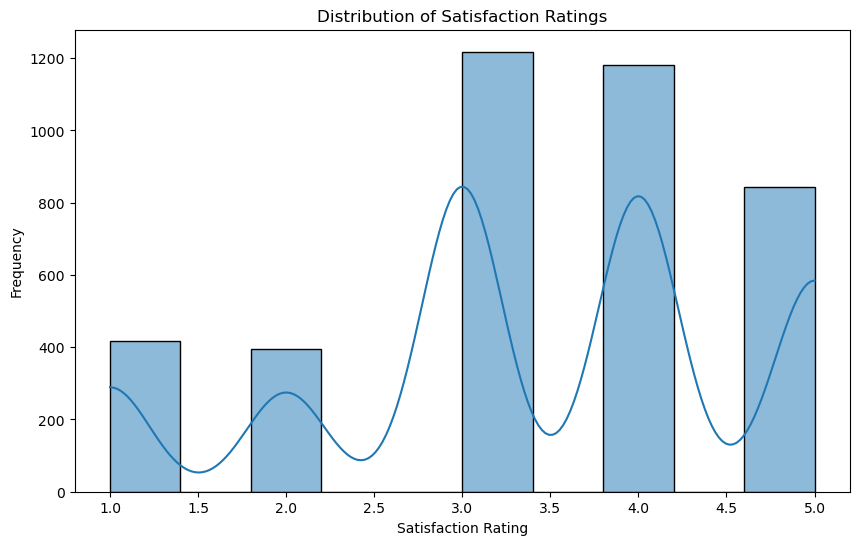

In [190]:
# Distribution of Satisfaction Ratings
plt.figure(figsize=(10, 6))
sns.histplot(callCenter_df['Satisfaction rating'], bins=10, kde=True)
plt.title('Distribution of Satisfaction Ratings')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Frequency')
plt.show()

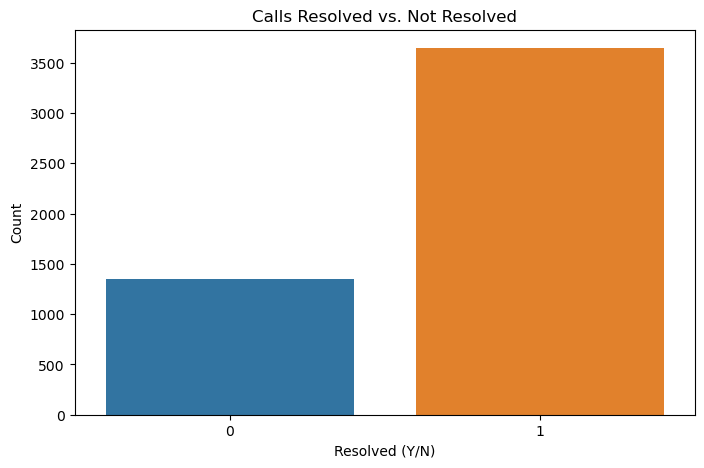

In [191]:
# Calls Resolved vs. Not Resolved
plt.figure(figsize=(8, 5))
sns.countplot(x='Resolved', data=callCenter_df)
plt.title('Calls Resolved vs. Not Resolved')
plt.xlabel('Resolved (Y/N)')
plt.ylabel('Count')
plt.show()

In [192]:
# Calculate metrics
agent_performance = callCenter_df.groupby('Agent').agg(
    AvgSatisfaction=('Satisfaction rating', 'mean'),
    TotalCalls=('Call Id', 'count'),
    ResolutionRate=('Resolved', lambda x: (x == 1).mean()),  # Percentage of 'Y'
   # AvgTalkDuration=('AvgTalkDuration', 'mean'),
    AvgSpeedOfAnswer=('Speed of answer in seconds', 'mean')
).reset_index()
agent_performance

,Agent,AvgSatisfaction,TotalCalls,ResolutionRate,AvgSpeedOfAnswer
0,Becky,3.371373,631,0.732171,65.330754
1,Dan,3.447419,633,0.744076,67.282983
2,Diane,3.405190,633,0.714060,66.267465
3,Greg,3.404382,624,0.729167,68.444223
4,Jim,3.393657,666,0.728228,66.343284
5,Joe,3.330579,593,0.735245,70.987603
6,Martha,3.470817,638,0.722571,69.488327
7,Stewart,3.400419,582,0.728522,66.184486


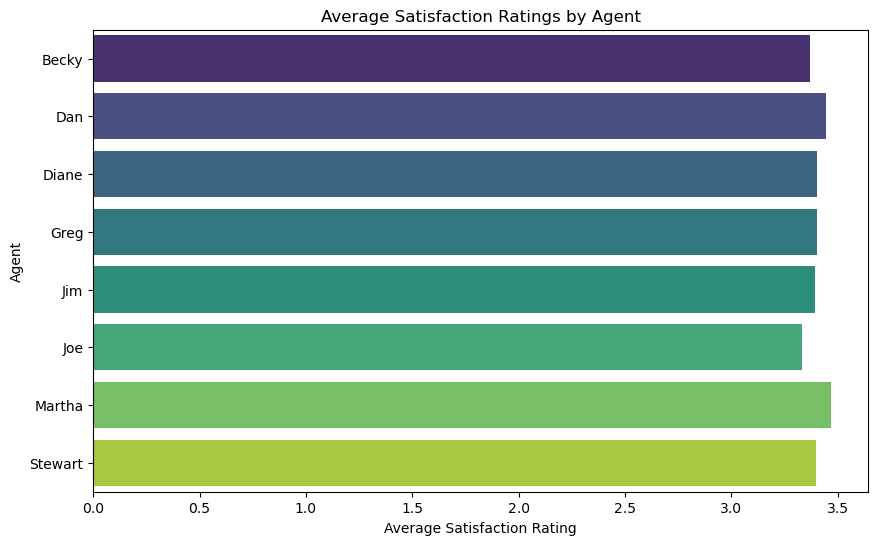

In [193]:
# Visualization of Average Satisfaction Ratings
plt.figure(figsize=(10, 6))
sns.barplot(x='AvgSatisfaction', y='Agent', data=agent_performance, palette='viridis')
plt.title('Average Satisfaction Ratings by Agent')
plt.xlabel('Average Satisfaction Rating')
plt.ylabel('Agent')
plt.show()

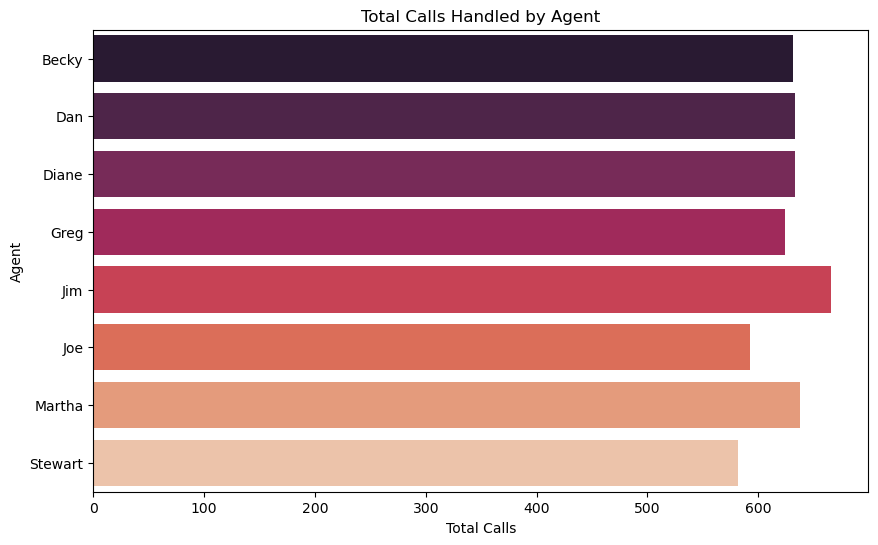

In [194]:
# Visualization of Total Calls Handled
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalCalls', y='Agent', data=agent_performance, palette='rocket')
plt.title('Total Calls Handled by Agent')
plt.xlabel('Total Calls')
plt.ylabel('Agent')
plt.show()

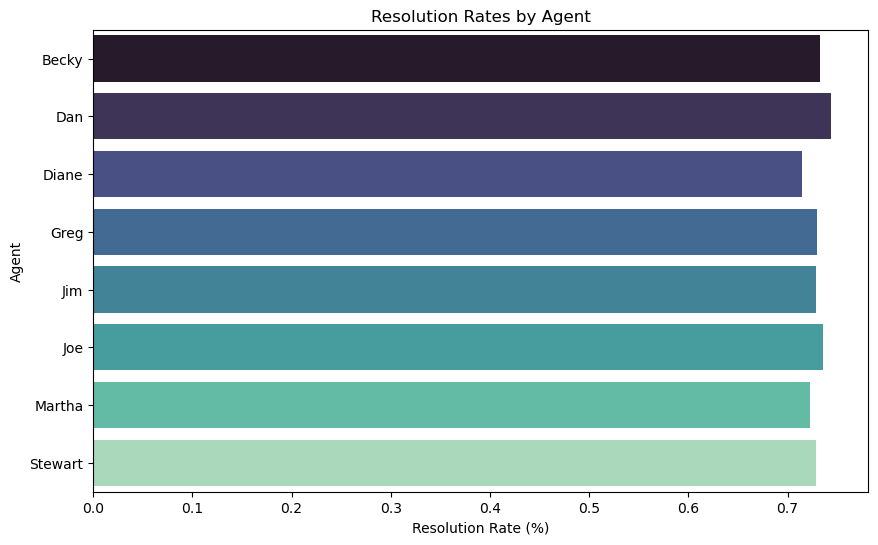

In [195]:
# Visualization of Resolution Rates
plt.figure(figsize=(10, 6))
sns.barplot(x='ResolutionRate', y='Agent', data=agent_performance, palette='mako')
plt.title('Resolution Rates by Agent')
plt.xlabel('Resolution Rate (%)')
plt.ylabel('Agent')
plt.show()

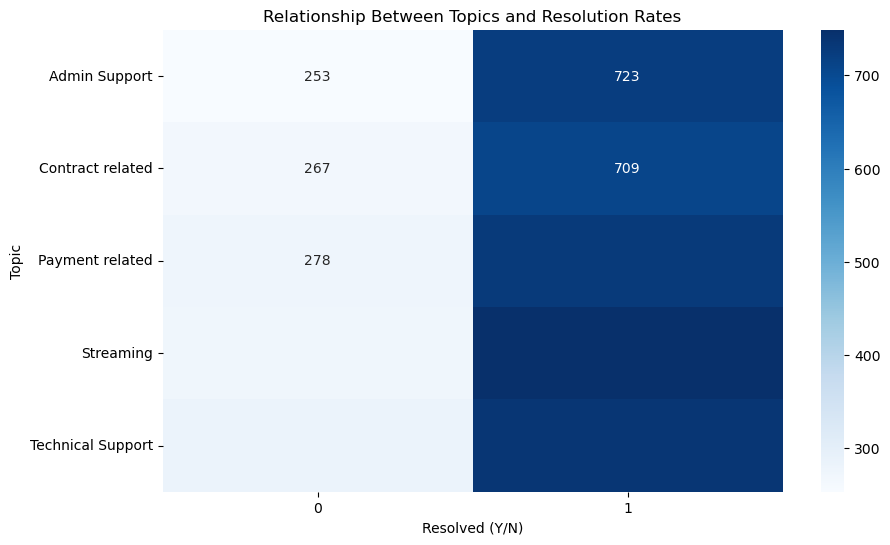

In [196]:
# Pivot table for topics and resolution rates
topic_resolution = callCenter_df.pivot_table(index='Topic', columns='Resolved', values='Call Id', aggfunc='count', fill_value=0)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(topic_resolution, annot=True, cmap='Blues', fmt='d')
plt.title('Relationship Between Topics and Resolution Rates')
plt.xlabel('Resolved (Y/N)')
plt.ylabel('Topic')
plt.show()

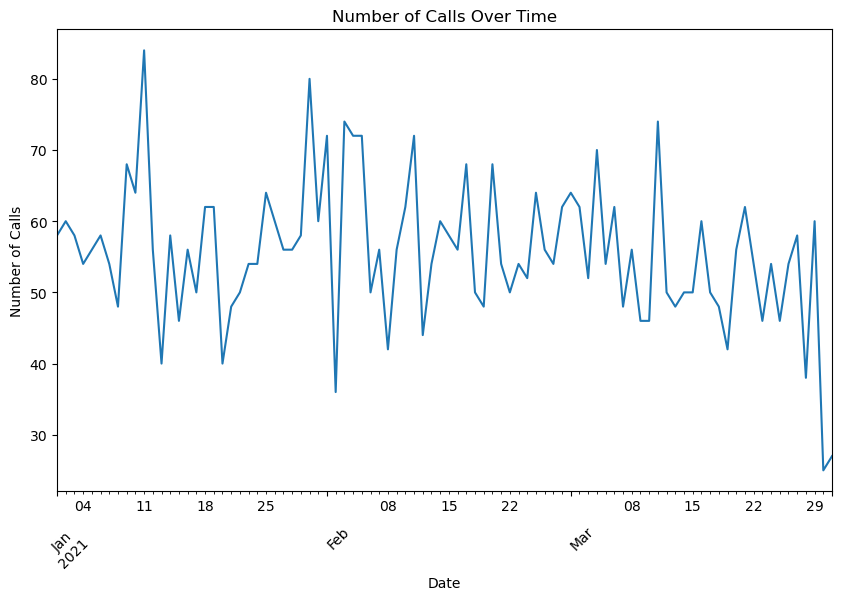

In [197]:
# Resample to get daily counts
calls_over_time = callCenter_df.resample('D', on='DateTime').size()

plt.figure(figsize=(10, 6))
calls_over_time.plot(kind='line')
plt.title('Number of Calls Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.show()

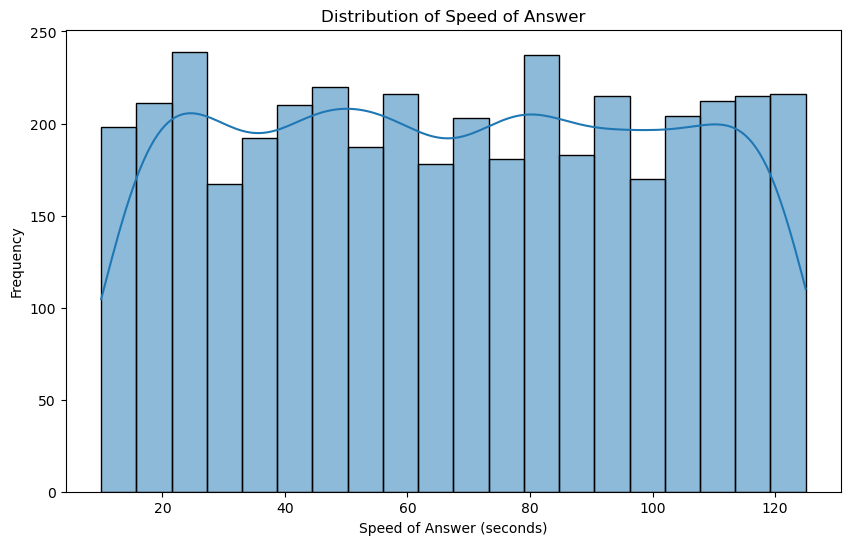

In [198]:
plt.figure(figsize=(10, 6))
sns.histplot(callCenter_df['Speed of answer in seconds'], bins=20, kde=True)
plt.title('Distribution of Speed of Answer')
plt.xlabel('Speed of Answer (seconds)')
plt.ylabel('Frequency')
plt.show()

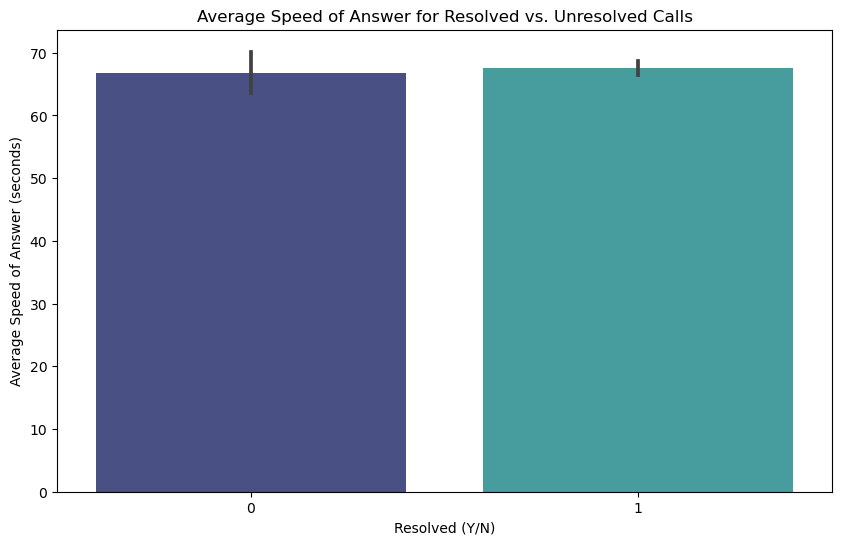

In [199]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Resolved', y='Speed of answer in seconds', data=callCenter_df, estimator='mean', palette='mako')
plt.title('Average Speed of Answer for Resolved vs. Unresolved Calls')
plt.xlabel('Resolved (Y/N)')
plt.ylabel('Average Speed of Answer (seconds)')
plt.show()